In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline       
#在行内显示图像
plt.style.use('ggplot')   #更改绘图风格，R语言中绘图库的风格
plt.rcParams['font.sans-serif'] = ['simhei']

In [72]:
#导入数据
colums = ['user_id','order_dt','order_products','order_amount']   
df = pd.read_table('CDNOW_master.txt',names=colums,sep='\s+')   #read_table读取txt文件   #sep:'\s+'  匹配任意个空格
df.head()
#1.日期格式需要转换
#2.存在一个用户一天内购买多次的行为

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [73]:
df.describe()
#1.用户平均每笔订单购买2.4个商品，标准差为2.3,稍有波动，属于正常。
# 然而在75%分位数的时候，说明绝大部分订单购买量都不多，主要围绕在2~3个产品左右
#2.购买金额。反映出大部分订单消费金额集中在中小金额，中位数小于平均值，大部分人购买金额达不到平均值，集中在20~30左右
#（视频中说大部分订单在30~45左右）

,user_id,order_dt,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [74]:
df.info()     #每一列都是69659条数据，说明没有空值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         69659 non-null  int64  
 1   order_dt        69659 non-null  int64  
 2   order_products  69659 non-null  int64  
 3   order_amount    69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


# 数据预处理

In [75]:
df['order_date'] = pd.to_datetime(df['order_dt'],format='%Y%m%d')     #   %Y%m%d 代表年（4位）月（2位）日（2位）
# to_datetime：将数据格式转换为时间型(datetime)数据
# format参数：按照指定格式去匹配要转换的数据列
# %Y 四位的年    %y 两位的年分
# %m 两位的月
# %d 两位的日
# %h 两位的小时
# %M 两位的分钟
# %s 两位的秒
#  以上参数严格区分大小写

#将order_date 转化成精度为月份的数据列
#df['month'] = df['order_date'].astype('datetime64[M]') #  %[M]控制转换后的精度（为月份）
df['month'] = df['order_date'].map(lambda x:x.strftime('%Y-%m') )   
# strftime()函数是一种用于将日期和时间格式的数据转化为字符串的方法。
# x是order_date列[series]中的每个元素，每个元素都是datetime类型
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         69659 non-null  int64         
 1   order_dt        69659 non-null  int64         
 2   order_products  69659 non-null  int64         
 3   order_amount    69659 non-null  float64       
 4   order_date      69659 non-null  datetime64[ns]
 5   month           69659 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 3.2+ MB


In [76]:
df

,user_id,order_dt,order_products,order_amount,order_date,month
0,1,19970101,1,11.77,1997-01-01,1997-01
1,2,19970112,1,12.00,1997-01-12,1997-01
2,2,19970112,5,77.00,1997-01-12,1997-01
3,3,19970102,2,20.76,1997-01-02,1997-01
4,3,19970330,2,20.76,1997-03-30,1997-03
...,...,...,...,...,...,...
69654,23568,19970405,4,83.74,1997-04-05,1997-04
69655,23568,19970422,1,14.99,1997-04-22,1997-04
69656,23569,19970325,2,25.74,1997-03-25,1997-03
69657,23570,19970325,3,51.12,1997-03-25,1997-03


# 用户整体消费趋势分析（按月份）

Text(0.5, 1.0, '每月消费人数')

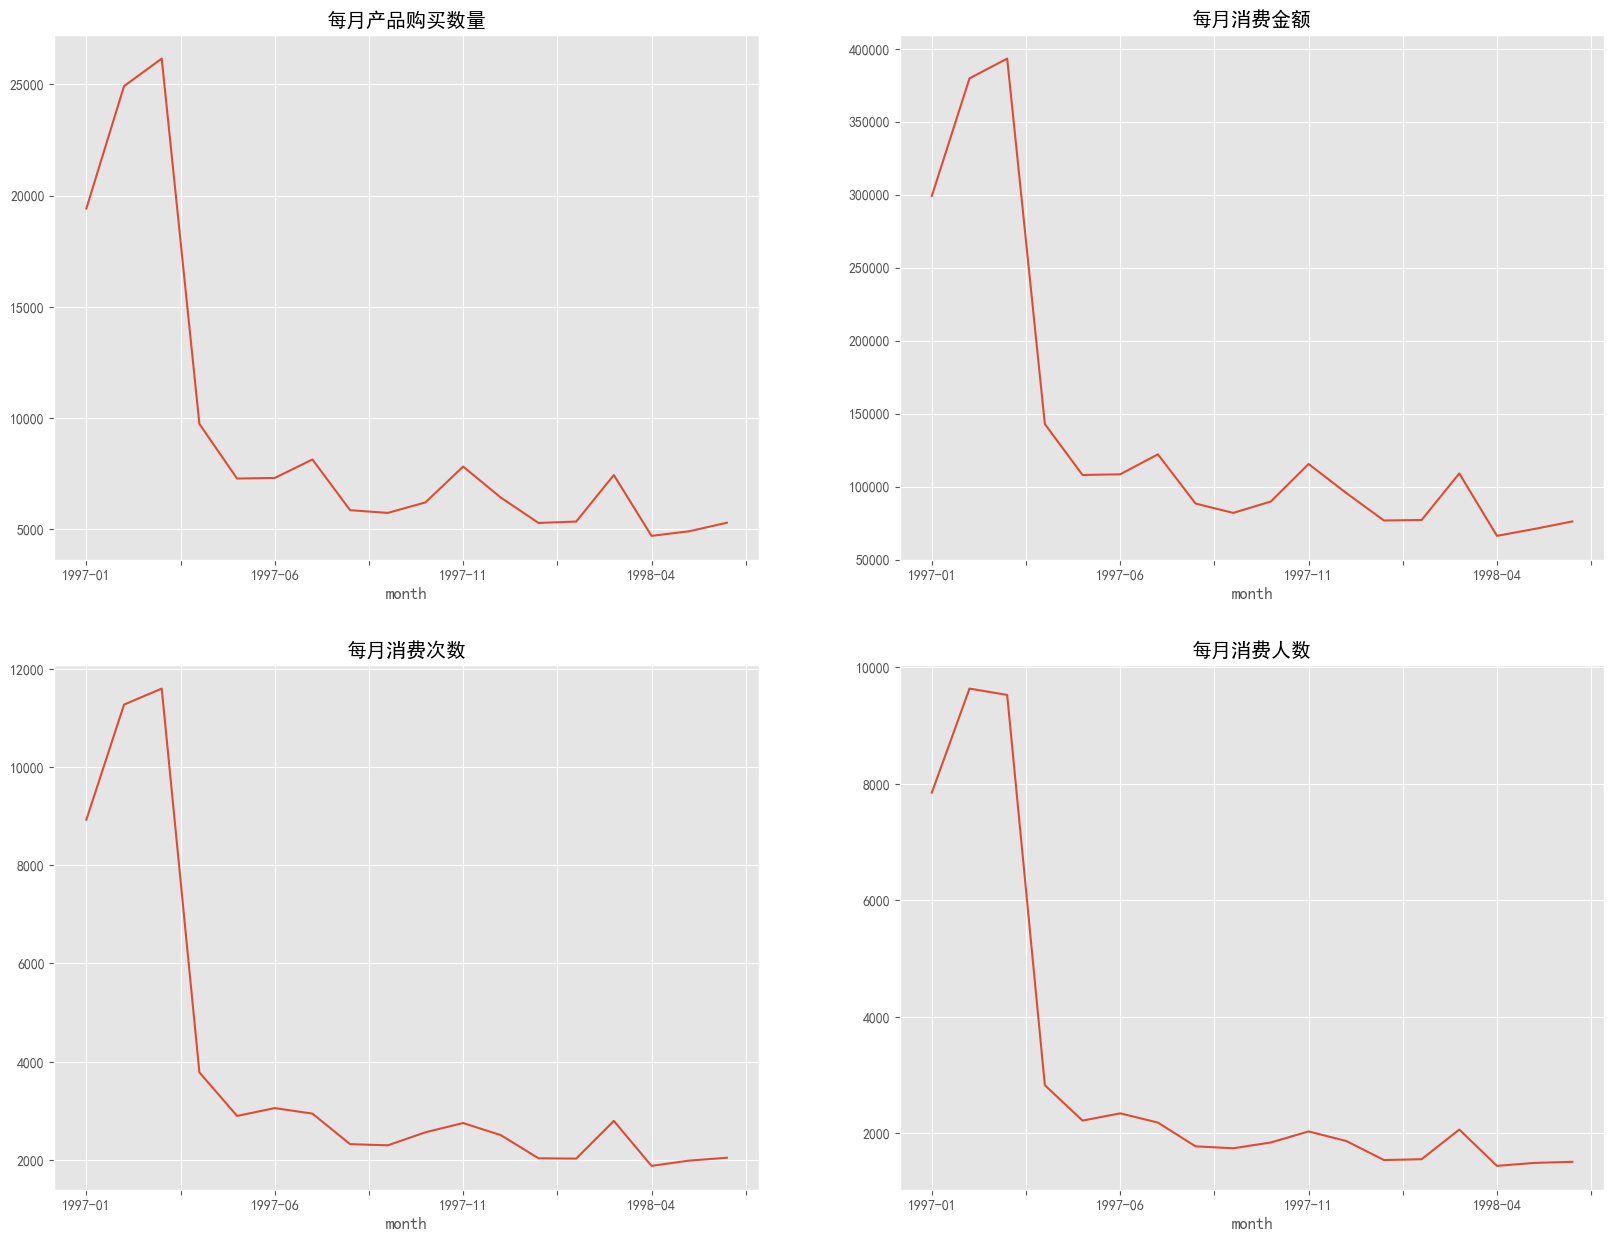

In [77]:
# 按月份统计产品购买数量，消费金额，消费次数，消费人数
 # plt.figure是用来创建一个图形对象的函数(可以理解为创建一个空白的画布，用于后续的绘图操作)
plt.figure(figsize=(20,15))   #单位是英寸    
plt.subplot(221)  # subplot(221) 绘制子图，两行两列，占据第一个位置（将多个图画到一个平面上的工具）
df.groupby('month')['order_products'].sum().plot()  #默认折线图
plt.title('每月产品购买数量')

plt.subplot(222)  #占据第二个位置
df.groupby('month')['order_amount'].sum().plot()  
plt.title('每月消费金额')

plt.subplot(223)  
df.groupby('month')['user_id'].count().plot()  
plt.title('每月消费次数')

#每月消费人数，统计user_id去重后的数量
plt.subplot(224)  
df.groupby('month')['user_id'].nunique().plot()  # nunique():用于计算指定列中不同值的数量(去重)
#另一种写法 df.groupby('month')['user_id'].apply(lambda x:len(x.drop_duplicates())).plot()

# apply()的核心功能是实现“批量”调度处理，至于批量做什么，由用户传入的函数决定(自定义或现成的函数)。
# 函数传递给apply()， apply()会帮用户在DataFrame和Series等对象中(按行或按列)批量执行传入的函数。

# drop_duplicates() 函数用于从 DataFrame 中删除重复的行
# llambda x:len(x.drop_duplicates()) 对整体的series（列）数据进行去重后，计算这个series（一维）数据的长度 （x代表整个series）
plt.title('每月消费人数')


### 分析结果
1.从图1可以看出前3个月销量非常高，而以后销量较为稳定，且稍微有点下降趋势。 <br>
2.图二与图一呈现基本相似的趋势，可以看出，消费金额与消费数量成正相关，三月份过后下降严重，后续趋于稳定，但也有点下降趋势。<br>
【消费数量*单价（不是恒定常数）=消费金额】   
3.图三可以看出前三个月订单数在10000左右，后续月份订单数在2500左右  
4.图四可以看出，前三个月消费人数在8000~10000左右，后续平均消费人数在2000不到的样子  
总结：所有数据显示，97年前三个月消费事态异常，后续趋于常态化。  

推测原因：（具体原因要看公司的具体业务）    
**可以看出前三个月销量很高是由消费人数多导致的。** **可能这段时间吸引到了一些非粘性客户。**     
1）.可能跟月份有关，在我国1-3月份处于春节前后。 <br>
2）.公司可能在1-3月份增大了营销力度，或者搞了些营销活动。 <br>

# 用户个体消费分析

### 1.用户消费金额，消费次数(产品数量)描述统计

In [78]:
user_grouped = df.groupby('user_id').sum()
print(user_grouped.describe())
print('用户数量',len(user_grouped))

# count：统计数据的数量1

# 购买数量：
# 从用户的角度：用户数量为23570个，每个用户平均购买7个CD，但是中位数只有3，
# 并且最大购买量为1033，平均值大于中位数，是典型的右偏分布（购买量大的用户替购买量<7的用户背锅了）

# 购买金额
# 平均用户消费是106左右，而中位数消费是43，并且存在土豪瀛湖13990，结合分位数和最大值来看，平均数几乎和75%分位数相等，
# 属于典型的右偏分布，说明存在一小部分高额消费（后25%的用户）拉高了整体平均值。

           order_dt  order_products  order_amount
count  2.357000e+04    23570.000000  23570.000000
mean   5.902627e+07        7.122656    106.080426
std    9.460684e+07       16.983531    240.925195
min    1.997010e+07        1.000000      0.000000
25%    1.997021e+07        1.000000     19.970000
50%    1.997032e+07        3.000000     43.395000
75%    5.992125e+07        7.000000    106.475000
max    4.334408e+09     1033.000000  13990.930000
用户数量 23570


In [79]:
user_grouped.sort_values(by='order_products',ascending=False)

,order_dt,order_products,order_amount
user_id,,,
14048,4334408312,1033,8976.33
7592,4014673988,917,13990.93
7983,2976285568,536,6973.07
7931,1238339479,514,6497.18
19339,1118338203,378,6552.70
...,...,...,...
12276,19970213,1,6.77
12277,19970213,1,14.37
12281,19970213,1,11.77


### 绘制每个用户的产品购买量与消费金额的散点图

<AxesSubplot:xlabel='order_products', ylabel='order_amount'>

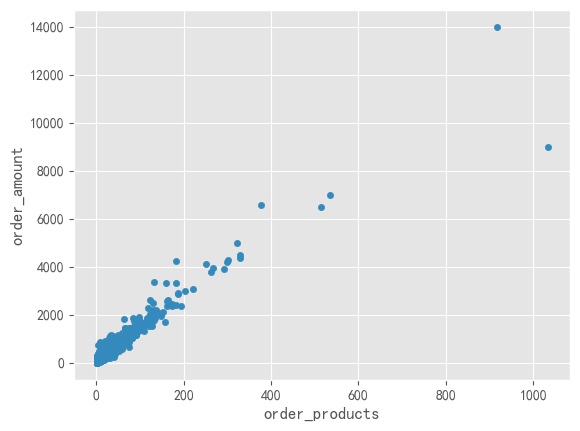

In [80]:
user_grouped.plot(kind='scatter',x='order_products',y='order_amount')


从图中可知，用户消费金额与购买量呈现线性趋势（正相关），可从图中看出每个商品均价在15左右（大部分用户购买的商品均价），  
订单的极值点比较少（消费金额>8000,或者购买量>600），对样本来说影响不大，可以忽略不计。

### 2.用户消费分布图

<AxesSubplot:xlabel='每个uid购买数量', ylabel='Frequency'>

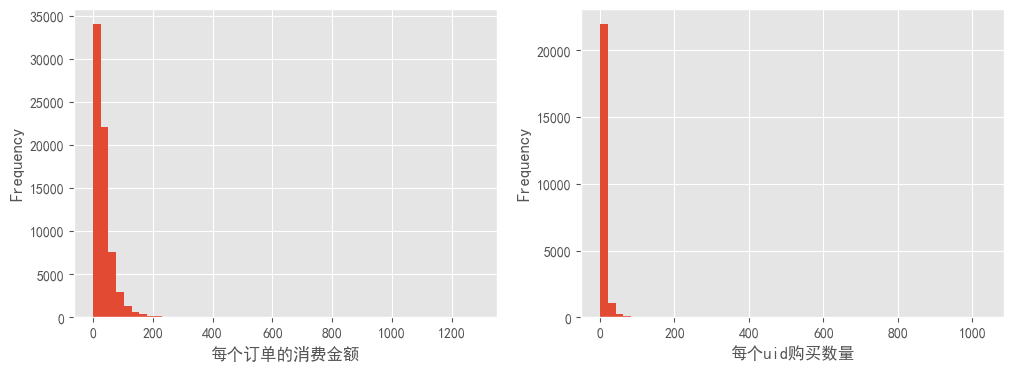

In [81]:
plt.figure(figsize=(12,4))  # plt.figure是用来创建一个图形对象的函数(可以理解为创建一个空白的画布，用于后续的绘图操作)
plt.subplot(121)
plt.xlabel('每个订单的消费金额')
df['order_amount'].plot(kind='hist',bins=50)   #bins:区间份数，会影响柱子的宽度，值越大，柱子越细，宽度=（列最大值-最小值）/bins

plt.subplot(122)
plt.xlabel('每个uid购买数量')
df.groupby(by="user_id")['order_products'].sum().plot(kind='hist',bins=50)   # Frequency ：出现次数

1.图一知，消费金额在100以内的人数占了绝大部分  
2.图二知,每个用户的购买数量较小，集中在50以内  
综上所述，用户消费主要以较低金额（<100）和较低数量（小于50）为主。在电商领域是非常正常的现象。  

## 用户累计消费金额占比分析（用户贡献度）

In [82]:
#进行用户分组，取出消费金额，进行求和，排序，重置索引
user_cumsum = df.groupby('user_id')['order_amount'].sum().sort_values(ascending=False).reset_index()  #排序后不要忘记重置索引
user_cumsum                                 # cum 表示累计

,user_id,order_amount
0,7592,13990.93
1,14048,8976.33
2,7983,6973.07
3,19339,6552.70
4,7931,6497.18
...,...,...
23565,22848,0.00
23566,15258,0.00
23567,1381,0.00
23568,15129,0.00


In [83]:
#每个用户消费金额累加  
#累加器举例
# a = [1,2,3,4,5,6,7]
# np.cumsum(a)     #累加求和，即将一系列数值逐个累加，得到每一个数值点对应的累计总量

#使用pandas的DataFrame时，通常不需要在调用第三方库的方法时加上模块名。
#这是因为pandas已经将这些方法作为自己的特性进行了包装，你可以直接在DataFrame对象上调用它们


user_cumsum['累计金额'] = user_cumsum['order_amount'].cumsum().round()    #round() 默认保留一位小数 
user_cumsum


,user_id,order_amount,累计金额
0,7592,13990.93,13991.0
1,14048,8976.33,22967.0
2,7983,6973.07,29940.0
3,19339,6552.70,36493.0
4,7931,6497.18,42990.0
...,...,...,...
23565,22848,0.00,2500316.0
23566,15258,0.00,2500316.0
23567,1381,0.00,2500316.0
23568,15129,0.00,2500316.0


In [84]:

amount_total = user_cumsum['累计金额'].max()
user_cumsum['prop'] = user_cumsum.apply(lambda x: round(x['累计金额']/amount_total,4),axis=1)
# round()函数 : 对浮点数进行四舍五入，并指定保留的小数位数
user_cumsum


#  apply : 用于遍历数组中的行或列，并且使用指定函数来对其元素进行处理，默认axis=0(对列操作)。

,user_id,order_amount,累计金额,prop
0,7592,13990.93,13991.0,0.0056
1,14048,8976.33,22967.0,0.0092
2,7983,6973.07,29940.0,0.0120
3,19339,6552.70,36493.0,0.0146
4,7931,6497.18,42990.0,0.0172
...,...,...,...,...
23565,22848,0.00,2500316.0,1.0000
23566,15258,0.00,2500316.0,1.0000
23567,1381,0.00,2500316.0,1.0000
23568,15129,0.00,2500316.0,1.0000


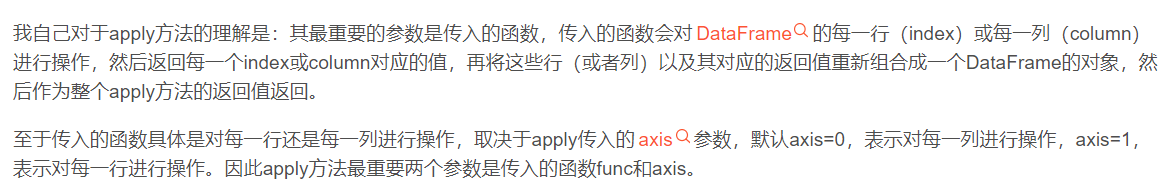

<AxesSubplot:>

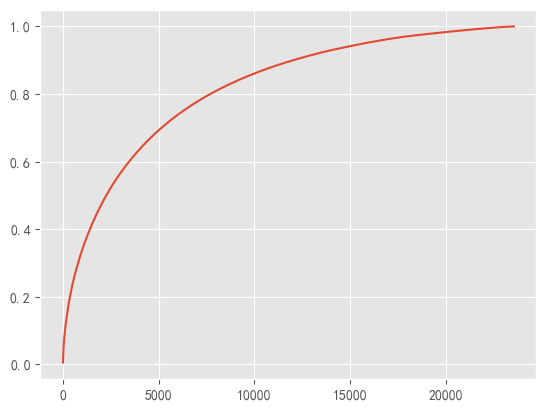

In [85]:
user_cumsum['prop'].plot()

由图分析可知，按照消费金额从高到底排列，消费高的前5000名用户贡献了总消费金额的70%（消费金额靠前的18%的用户贡献了70%的消费。[类似2/8原则]）

# 用户消费行为

<p style="font-size:18px;">1.首购时间</p>

<AxesSubplot:>

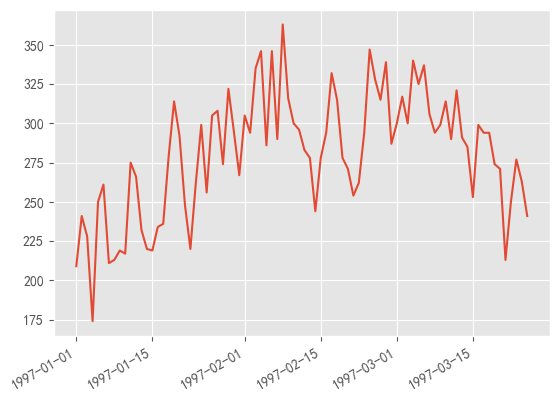

In [86]:
#用户分组，取最小值，即为首购时间
#df.groupby('user_id')['order_date'].min().count()   #区分
df.groupby('user_id')['order_date'].min().value_counts().plot()
#1.value_counts()是Pandas中的一个函数，用于计算一个Series中每个唯一值的频数。
#  它返回一个新的Series对象，其中索引是唯一值，而值是对应的频数。
#2.频数，也称为“次数”，是指在统计学中，对一组数据按照一定的规则或标准进行分组后，每个组内数据的个数。

由图可知，首次购买的用户量在1.1-2.10号左右呈上升趋势，后续开始逐步回落。猜测，有可能是公司产品的推广力度或者价格的调整所致。

<p style="font-size:18px;">2.最后一次购买时间</p>

<AxesSubplot:>

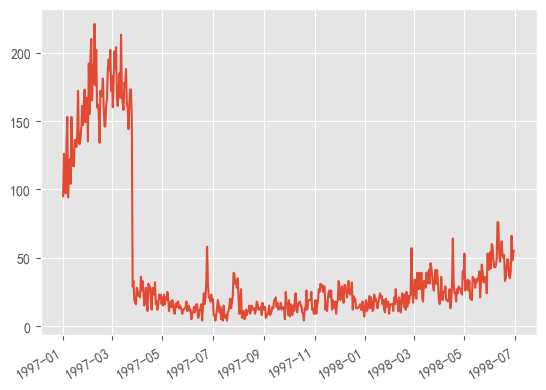

In [87]:
df.groupby('user_id')['order_date'].max().value_counts().plot()

大多数用户最后一次购买时间集中在前三个月，说明缺少忠诚客户。  
但是，随着时间的推移，最后一次购买商品的用户量呈现上升趋势。  
猜测，这份数据选择的是前三个月消费的用户在后面18个月的跟踪记录。  

# 用户分层

<p style="font-size:18px;">1.构建RFM模型 (使用透视表)</p>

In [88]:
#透视表的使用

#（index:相当于groupby，values:取出的数据列，aggfunc:key值必须存在于values当中，且必须跟随有效聚合函数[max,sum,min ......]）
rfm = df.pivot_table(index='user_id', 
                     values=['order_products','order_amount','order_date'],
                    aggfunc={
                        'order_date':'max',   #最后一次购买      key-value:键-值对
                        'order_products':'count',  # 统计购买了几次
                        'order_amount':'sum'    #消费总金额
                    })
rfm.head()

,order_amount,order_date,order_products
user_id,,,
1,11.77,1997-01-01,1
2,89.00,1997-01-12,2
3,156.46,1998-05-28,6
4,100.50,1997-12-12,4
5,385.61,1998-01-03,11


In [89]:
#  用每个用户的最后一次购买时间-日期中的最大值(1998-6-30)，最后再转换成天数，小数保留一位
rfm['R'] = -(rfm['order_date'] - rfm['order_date'].max())/np.timedelta64(1,'D') #取相差的天数，保留一位小数
#除以np.timedelta64(1,'D')的目的是去掉单位days
rfm.rename(columns={'order_products':'F','order_amount':'M'},inplace=True)
rfm

,M,order_date,F,R
user_id,,,,
1,11.77,1997-01-01,1,545.0
2,89.00,1997-01-12,2,534.0
3,156.46,1998-05-28,6,33.0
4,100.50,1997-12-12,4,200.0
5,385.61,1998-01-03,11,178.0
...,...,...,...,...
23566,36.00,1997-03-25,1,462.0
23567,20.97,1997-03-25,1,462.0
23568,121.70,1997-04-22,3,434.0


In [90]:
# RFM计算方式：每一列数据减去数据所在列的平均值，有正有负，根据结果值，与1作比较，如果>=1，设置为1，否则0
# rfm['R']-rfm['R'].mean()
def rfm_func(x):   #x:分别代表每一列数据
    level = x.apply(lambda x:'1' if x>=1 else '0')   # 是>=1,还是>=0 ?????
    #print(level.head())
    label = level['R'] + level['F'] + level['M']   #label是一个字符串,100 或 001 (RFM)
    #定义一个字典d
    d = {
        '111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要发展客户',
        '001':'重要挽留客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般发展客户',
        '000':'一般挽留客户',
    }
    result = d[label]    #根据字典的键返回对应值,并将其赋值给result
    return result
    
rfm["label"] = rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis=1)   # axis=1表示在行级别上应用函数,默认axis=0
rfm



,M,order_date,F,R,label
user_id,,,,,
1,11.77,1997-01-01,1,545.0,一般发展客户
2,89.00,1997-01-12,2,534.0,一般发展客户
3,156.46,1998-05-28,6,33.0,重要保持客户
4,100.50,1997-12-12,4,200.0,一般保持客户
5,385.61,1998-01-03,11,178.0,重要保持客户
...,...,...,...,...,...
23566,36.00,1997-03-25,1,462.0,一般发展客户
23567,20.97,1997-03-25,1,462.0,一般发展客户
23568,121.70,1997-04-22,3,434.0,重要发展客户


### 客户分层可视化

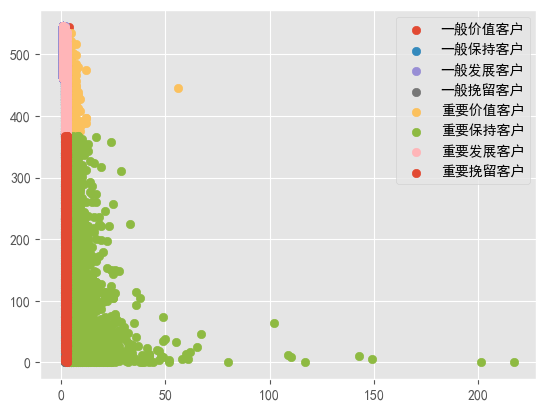

In [91]:
for label,grouped in rfm.groupby('label'):
   # print(label,grouped)
    x = grouped['F']   #单个用户的购买次数(消费频率)
    y = grouped['R']   #最近一次购买日期减去所有日期中的最大值(1998-6-30)
    plt.scatter(x,y,label=label)
plt.legend()    #显示图例
                #图例是集中于地图一角或一侧的地图上各种符号和颜色所代表内容与指标的说明

由图可知, 公司最期待的客户(重要保持客户)占据绝大多数,还是非常不错的.

## 新老，活跃，回流用户分析

In [92]:
pivoted_counts = df.pivot_table(
    index="user_id",
    columns='month',              # index：透视表的行索引名称。  columns：透视表的列索引名称。
    values='order_dt',           # values：需要进行聚合操作的列名称。
    aggfunc='count'              # aggfunc：用于聚合的函数或函数列表
).fillna(0)
pivoted_counts.head()

month,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [93]:
# 由于浮点数不直观，且需要转成是否消费过，用0、1表示       消费过:1   没消费:0
df_purchase = pivoted_counts.applymap(lambda x: 1 if x>0 else 0)
#apply:作用于dataframe数据中的一列或者一行数据
#applymap:作用于dataframe数据中的每一个元素
#map:本身是一个series的函数，在dataframe结构中无法使用map函数，map函数作用于series中的每一个元素
df_purchase

month,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23567,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23568,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [94]:
# 判断是否是新用户，活跃用户，不活跃用户，回流用户。
def active_status(data):   # data:整行数据，共18列【代表df_purchase,apply(active_status,axis=1)传进来的行数据】
    status = []    #负责存储18个月的状态    unreg:未注册（未下单）
    for i in range(18):
        if data[i] == 0:
        #本月没消费   
            if len(status) == 0:   #前面没有任何记录(第一个月份)
                status.append('unreg')
            else: #开始判断上一个状态
                if status[i-1] == 'unreg':
                    status.append('unreg')
                else: #new/active/unactive/return           
                    status.append('unactive')
        else:
        #本月有消费  (data[i]=1)
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1]== 'unreg':
                     status.append('new')
                elif status[i-1]=='unactive':    
                     status.append('return')
                else:  #new/active/return ==1
                    status.append('active')   #连续两次==1就是active
          
    return pd.Series(status,df_purchase.columns)      #值：status， 列名df_purchase中的列名
        
puchase_status = df_purchase.apply(active_status,axis=1)
puchase_status

month,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
23567,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
23568,unreg,unreg,new,active,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive


In [95]:
puchase_status_ct = puchase_status.replace('unreg',np.NaN).apply(lambda x: pd.value_counts(x),axis=0)   #unreg：未下单
puchase_status_ct

month,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06
active,NaN,1157.0,1681,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624.0,632.0,512.0,472.0,571.0,518.0,459.0,446.0
new,7846.0,8476.0,7248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return,NaN,NaN,595,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1404.0,1232.0,1025.0,1079.0,1489.0,919.0,1029.0,1060.0
unactive,NaN,6689.0,14046,20748.0,21356.0,21231.0,21390.0,21798.0,21831.0,21731.0,21542.0,21706.0,22033.0,22019.0,21510.0,22133.0,22082.0,22064.0


<AxesSubplot:xlabel='month'>

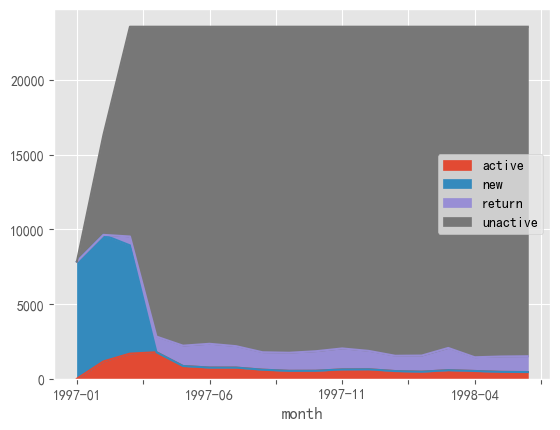

In [96]:
puchase_status_ct.fillna(0).T.plot.area()   # .T 行列变换(转置)

1.前三个月可知，红色活跃用户和蓝色新用户占比较大。  
2.四月份过后，新用户和活跃用户，开始下降，6月份后且呈现稳定趋势，稳定的活跃用户是网站的重要客户。  
3.回流用户主要产生在4月之后，呈现稳定趋势，也是网站的重要客户。

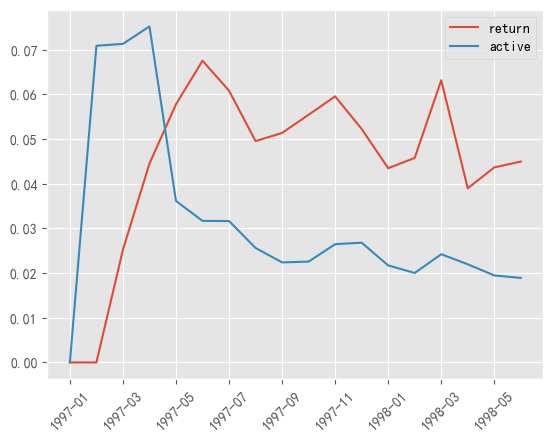

In [97]:
#各类用户的占比
rate = puchase_status_ct.fillna(0).T.apply(lambda x:x/x.sum(),axis=1)   #将一行(Series)中的每个元素都除以该行(Series)的总和。
plt.plot(rate['return'],label='return')
plt.plot(rate['active'],label='active')
plt.xticks(range(0, len(puchase_status_ct.fillna(0).T.index), 2), puchase_status_ct.fillna(0).T.index[::2], rotation=45)
plt.legend()


1.回流用户，前五个月，回流用户上涨，过后呈现下降趋势，平均维持在5%左右。  
2.活跃用户，前3个月，活跃用户大量增长，猜测由于网站活动吸引来很多新用户导致的，4月后出现剧烈下降，  
&emsp;5月后趋于平稳但也呈现下降趋势，平均维持在2.5%左右。猜测活动可能在3月底—4月初结束了。   
3.网站运营稳定后，回流用户占比大于活跃用户，属于电商网站的正常现象，因为用户难以保持每月持续不断的消费。


# 用户购买周期

In [98]:
#shift函数：将数据移动到一定位置
#dataframe.shift(axis=0) 数据整体向下移一行（默认值：axis=0）
#dataframe.shift(axis=1) 数据整体向右移动一个位置（一列）

In [99]:
#计算购买周期(购买日期的时间差值)
order_diff = df.groupby('user_id').apply(lambda x: x['order_date']-x['order_date'].shift()) #当前订单日期减去上一次订单日期
order_diff.describe()
#大多数用户的购买周期在100天以内

count                         46089
mean     68 days 23:22:13.567662566
std      91 days 00:47:33.924168893
min                 0 days 00:00:00
25%                10 days 00:00:00
50%                31 days 00:00:00
75%                89 days 00:00:00
max               533 days 00:00:00
Name: order_date, dtype: object

<AxesSubplot:>

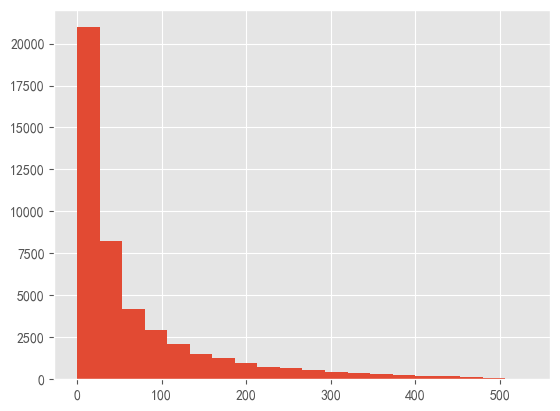

In [100]:
(order_diff/np.timedelta64(1,'D')).hist(bins=20) # bins（箱子）影响柱子的宽度       每个柱子的宽度=（最大值-最小值）/bins


1.由图可知，用户平均消费周期为68天。  
2.大多数用户消费周期低于100天。  
3.呈现典型的长尾分布，只有少部分用户的消费周期在200天以上（不积极消费的用户），  
可以在这批用户消费后三天左右进行电话回访或者短信赠送优惠券等活动，增大其消费频率。  

# 用户生命周期

In [101]:
#计算方式：（用户最后一次购买日期） - （第一次购买日期），如果差值==0，说明用户仅仅购买了一次


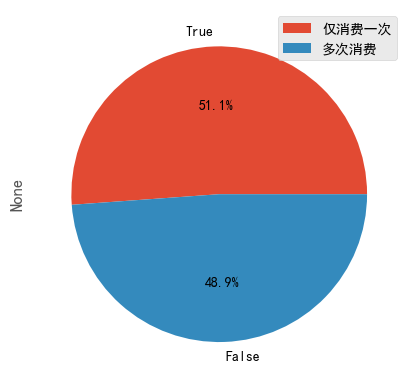

In [102]:
# 方法一： df.groupby('user_id')['order_date'].apply(lambda x: x.max()-x.min())
user_life = df.groupby('user_id')['order_date'].agg(['max','min'])
#((user_life['max']-user_life['min'])/np.timedelta64(1,'D')==0).value_counts()

 #value_counts() 可以统计指定列中各个值出现的次数。
(user_life['max']==user_life['min']).value_counts().plot.pie(autopct='%1.1f%%')#格式化为1位小数【扇区的百分比标签（Auto Percentage Text）】   
plt.legend(['仅消费一次','多次消费'])



一半以上的用户，仅仅消费了一次，说明运营情况不好，留存率不好

In [103]:
(user_life['max']-user_life['min']).describe()    #用户生命周期描述性统计

count                          23570
mean     134 days 20:55:36.987696224
std      180 days 13:46:43.039788104
min                  0 days 00:00:00
25%                  0 days 00:00:00
50%                  0 days 00:00:00
75%                294 days 00:00:00
max                544 days 00:00:00
dtype: object

用户平均生命周期是134天，但是中位数为0，再次验证了一半以上用户只消费了一次，为低质量用户。  
75%分位数以后的用户，生命周期>294天，属于核心用户，需要着重维持。  
本数据主要是对前三个月新用户的跟踪记录，所以分析的是新用户的生命周期，这些新用户一半以上消费了一次就走了，也有一小部分（25%）用户留下了，能在网站上维持消费一年。

### 绘制所有用户生命周期直方图+多次消费



Text(0, 0.5, '用户数')

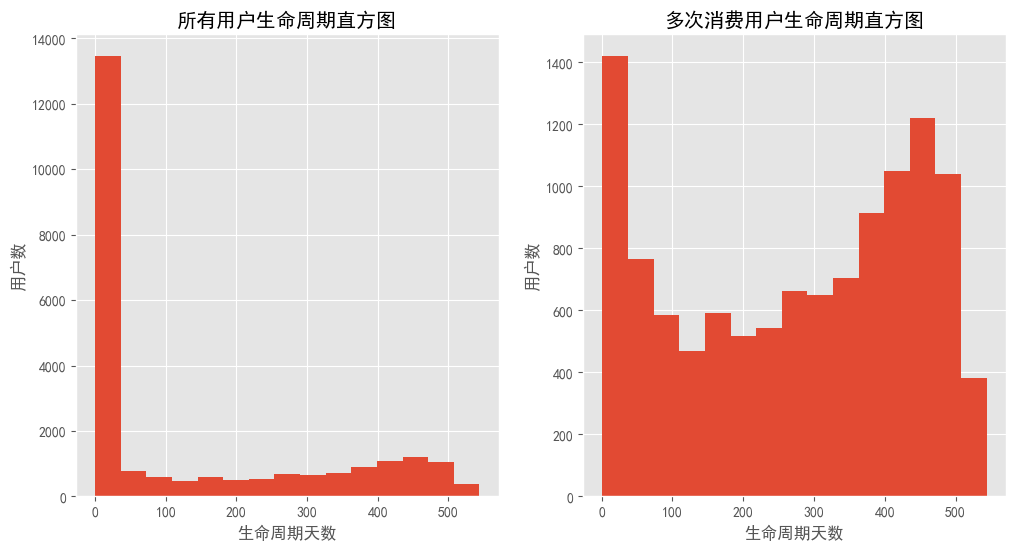

In [104]:
plt.figure(figsize=(12,6))
plt.subplot(121)
((user_life['max']-user_life['min'])/np.timedelta64(1,'D')).hist(bins=15)
plt.title('所有用户生命周期直方图')
plt.xlabel('生命周期天数')
plt.ylabel('用户数')

# 视频中的方法：u_1 = (user_life['max']-user_life['min']).reset_index()[0]/np.timedelta64(1,'D')  【个人认为无需重置索引】
u_1 = ((user_life['max']-user_life['min']))/np.timedelta64(1,'D')
plt.subplot(122)
u_1[u_1>0].plot(kind='hist',bins=15)
plt.title('多次消费用户生命周期直方图')
plt.xlabel('生命周期天数')
plt.ylabel('用户数')

1.对比可知，第二幅图过滤掉了生命周期为0的客户，呈现双峰结构，不过图2中还有一部分用户生命周期趋近于0天，这些用户虽然进行了多次消费，但不能长期消费，依然属于普通用户，可针对性地进行营销推广活动。  
2.少部分用户生命周期集中在300-500天，属于忠诚客户，需要大力维护此类客户。

# 复购率和回购率分析

## 复购率分析

计算方式：在自然月内，购买多次的用户在总消费人数中的占比。(若客户在同一天消费多次，也称为复购用户)

<AxesSubplot:xlabel='month'>

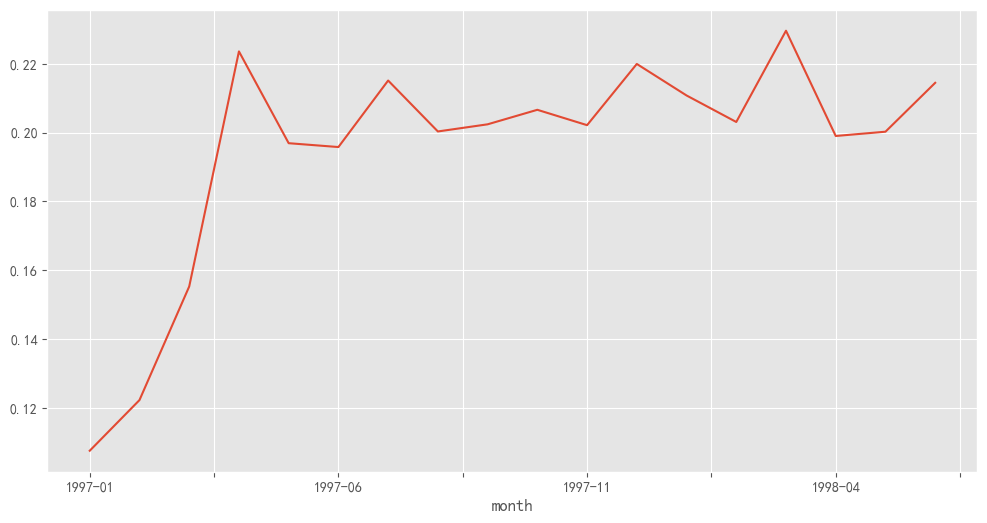

In [105]:
#消费者有三种：复购人数(消费记录>=2次的);消费人数；本月无消费人数   复购:1  非复购(只消费一次):0   无消费:NaN

#apply:作用于dataframe数据中的一列或者一行数据
#applymap:作用于dataframe数据中的每一个元素
#map:本身是一个series的函数，在dataframe结构中无法使用map函数，map函数作用于series中的每一个元素
purchase_r = pivoted_counts.applymap(lambda x: 1 if x>1 else 0 if x==1 else np.NaN)
#  ！！！！这里只能用applymap，原因如下：(要对每一个元素进行判断)
# applymap() 方法用于对 DataFrame 中的每个元素应用指定的函数，
# 而 apply() 方法用于对 DataFrame 的每一列或每一行应用指定的函数。
purchase_r

(purchase_r.sum()/purchase_r.count()).plot(figsize=(12,6))   #NaN 不会被count统计   画布大小:12*6
#purchase_r.sum()求出所有复购用户
#purchase_r.count()求出所有参与购物的用户  #NaN 不会被count统计

 

1.前四个月复购率上升，后续趋于平稳维持在20%~22%之间。  
2.分析前三个月复购率低的原因，可能是因为大批新用户仅仅购买一次造成的。

## 回购率分析

In [120]:
#计算方式：在一个时间窗口内进行了消费，在下一个窗口内又进行了消费。
#回购用户：1      非回购用户(上个月消费了，这个月没消费)：0             上个月未消费NaN
def purchase_back(data):                                         
    status=[]
    for i in range(1,18):                    
        #如果上个月没消费
        if data[i-1] == 0 :   
            status.append(np.NaN)                            #   ？？？？？回购率是归到当月还是上个月？？？？
        #如果上个月消费了
        else:
            #判断当月的情况
            if data[i]==0:
                status.append(0)
            else:
                status.append(1)
    status.append(np.NaN)          
    return pd.Series(status,df_purchase.columns)       #[1:18]

purchase_b = df_purchase.apply(purchase_back,axis=1)
purchase_b


month,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23567,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23568,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


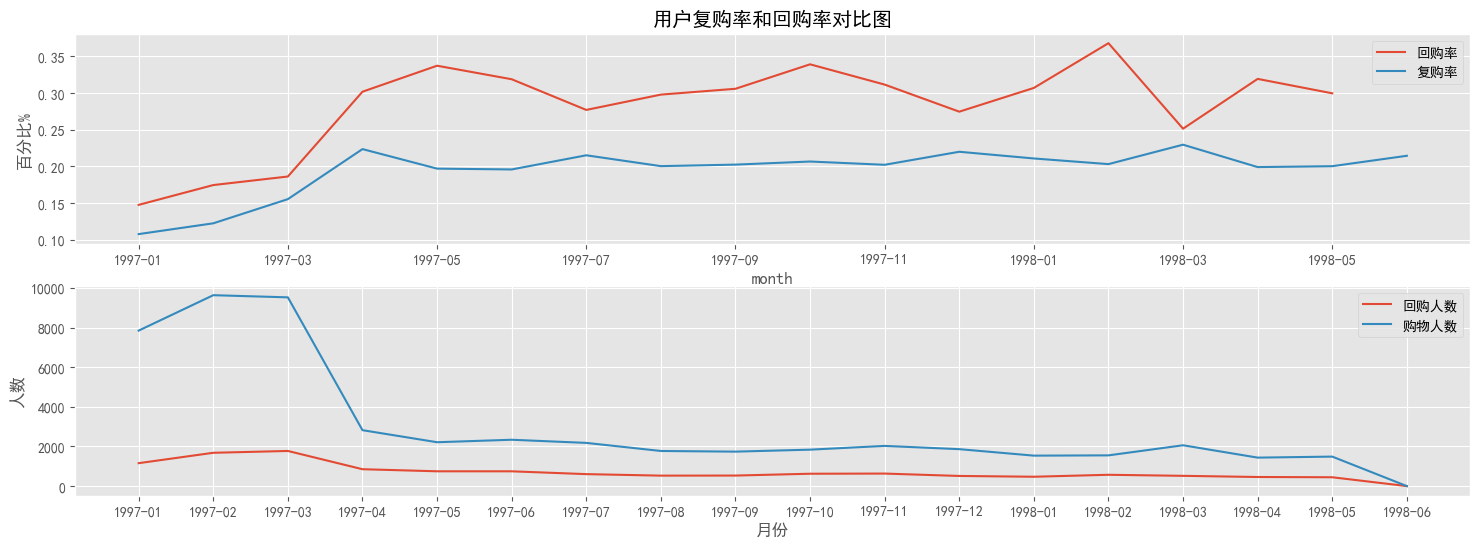

In [127]:
#回购率可视化
plt.figure(figsize=(18,6))
plt.subplot(211)
#回购率
(purchase_b.sum() / purchase_b.count()).plot(label = '回购率')
#复购率
(purchase_r.sum()/purchase_r.count()).plot(label = '复购率')   #[1:18]
plt.legend()
plt.ylabel('百分比%')
plt.title('用户复购率和回购率对比图')

#回购人数与购物总人数
plt.subplot(212)
plt.plot(purchase_b.sum(),label='回购人数')
plt.plot(purchase_b.count(),label='购物人数')
plt.xlabel('月份')
plt.ylabel('人数')
plt.legend()

一、图1分析：  
1.回购率平稳后在30%左右，波形性稍微较大。  
2.复购率低于回购率，平稳后在20%左右，波动性较小。  
3.前三个月，无论是回购还是复购，都呈现上升趋势，说明新用户需要一定时间来变成复购或者回购用户。  
4.结合新老用户分析，新客户忠诚度远低于老客户。  
二、图2分析：  
1.前三个月购物人数远远大于回购人数，主要是因为很多新用户在前3月份前进行了首次购买。  
2.四月后，回购人数和购物总人数开始稳定，回购人数稳定在1000左右，购物人数稳定在2000左右。  